## Housing Price Prediction of a US Based Company

In [2244]:
#import all the required libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2245]:
# read the data
housing_data = pd.read_csv('train.csv', sep=',')

In [2246]:
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Data Understanding and Exploration

In [2247]:
housing_data.nunique(axis=0)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [2248]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2249]:
housing_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [2250]:
housing_data.shape

(1460, 81)

In [2251]:
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Data Cleanup

### Handling missing values 

In [2252]:
# missing values imputation for categorical variables
missing_vals_col= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housing_data[missing_vals_col]= housing_data[missing_vals_col].fillna('Not Present')


In [2253]:
# selecting numeric columns from the dataset
housing_data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [2254]:
housing_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [2255]:
# normalizing GarageYrBlt column by GarageType column 
housing_data[housing_data.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

Not Present    1.0
Name: GarageType, dtype: float64

In [2256]:
housing_data['MSSubClass']= housing_data['MSSubClass'].astype('object')

C:\Users\arloh\AppData\Local\Temp\ipykernel_1844\2777716811.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

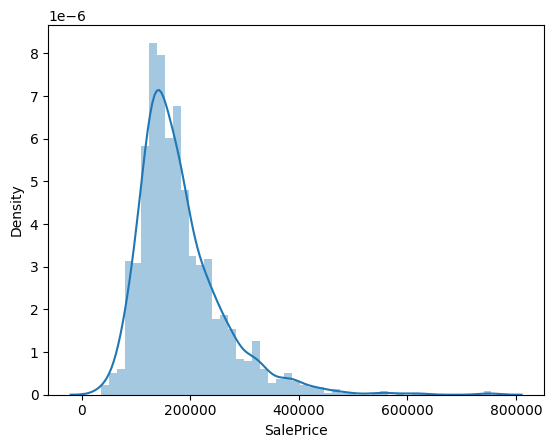

In [2257]:
# display the distribution of the target variable
sns.distplot(housing_data['SalePrice'])

In [2258]:
# select numeric columns from the dataset
housing_data_numeric = housing_data[['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']]
housing_data_numeric.head()

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
0       1710         548          856       856             8       2003   
1       1262         460         1262      1262             6       1976   
2       1786         608          920       920             6       2001   
3       1717         642          756       961             7       1915   
4       2198         836         1145      1145             9       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  LotFrontage  WoodDeckSF  2ndFlrSF  \
0          2003       196.0         706         65.0           0       854   
1          1976         0.0         978         80.0         298         0   
2          2002       162.0         486         68.0           0       866   
3          1970         0.0         216         60.0           0       756   
4          2000       350.0         655         84.0         192      1053   

   OpenPorchSF  LotArea  
0           61     8450  
1            0     9600  
2           42    11250  
3           35     9550  
4           84    14260

In [2259]:
def plot_outlier(data, columns):
    num_columns = len(columns)
    grid_cols = 3
    num_rows = (num_columns + grid_cols - 1) // grid_cols

    fig, axs = plt.subplots(num_rows, grid_cols, figsize=(15, 5*num_rows))
    fig.tight_layout(pad=3.0)

    for i, column in enumerate(columns):
        ax = axs[i // grid_cols, i % grid_cols]
        ax.boxplot(data[column])
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]
        
        ax.plot(data[column], 'ro', markersize=3) 
        ax.set_title(column)
        ax.set_ylabel(column)

    plt.show()

    return data
        

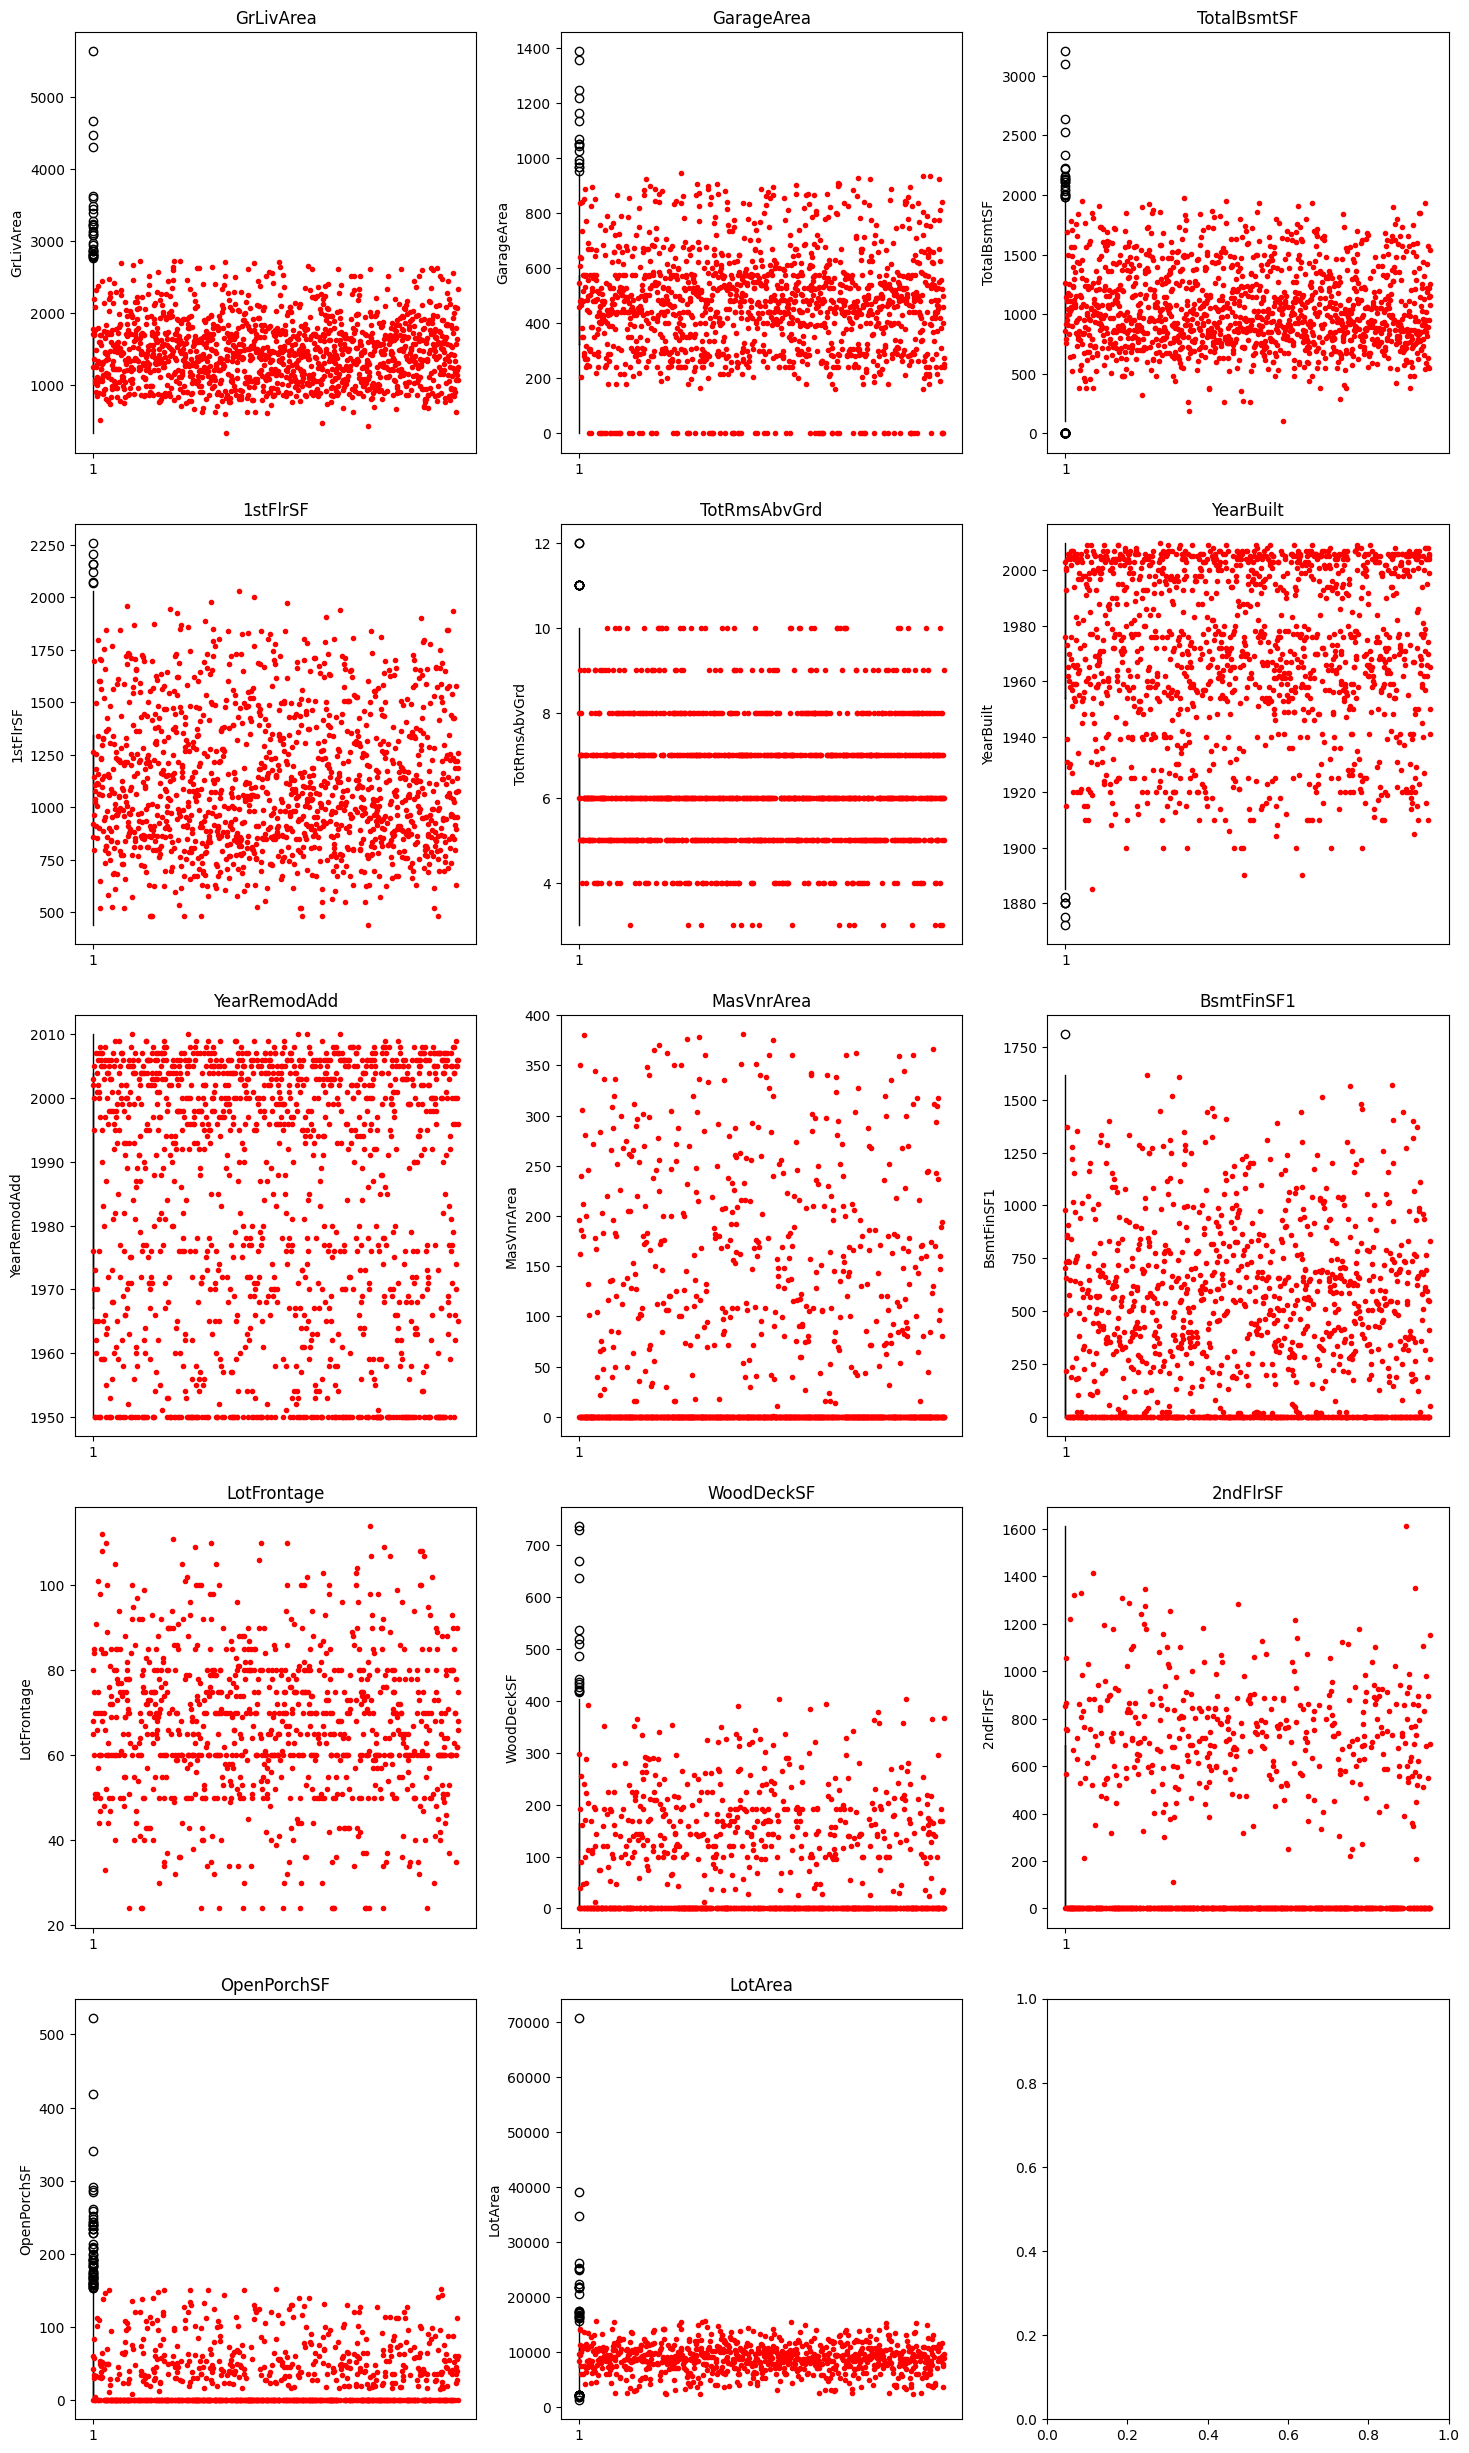

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
0          1710         548          856       856             8       2003   
1          1262         460         1262      1262             6       1976   
2          1786         608          920       920             6       2001   
3          1717         642          756       961             7       1915   
4          2198         836         1145      1145             9       2000   
...         ...         ...          ...       ...           ...        ...   
1452       1072         525          547      1072             5       2005   
1454       1221         400         1221      1221             6       2004   
1455       1647         460          953       953             7       1999   
1457       2340         252         1152      1188             9       1941   
1458       1078         240         1078      1078             5       1950   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  LotFrontage  WoodDeckSF  2ndFlrSF  \
0             2003       196.0         706         65.0           0       854   
1             1976         0.0         978         80.0         298         0   
2             2002       162.0         486         68.0           0       866   
3             1970         0.0         216         60.0           0       756   
4             2000       350.0         655         84.0         192      1053   
...            ...         ...         ...          ...         ...       ...   
1452          2005        80.0         547         35.0           0         0   
1454          2005         0.0         410         62.0           0         0   
1455          2000         0.0           0         62.0           0       694   
1457          2006         0.0         275         66.0           0      1152   
1458          1996         0.0          49         68.0         366         0   

      OpenPorchSF  LotArea  
0              61     8450  
1               0     9600  
2              42    11250  
3              35     9550  
4              84    14260  
...           ...      ...  
1452           28     3675  
1454          113     7500  
1455           40     7917  
1457           60     9042  
1458            0     9717  

[860 rows x 14 columns]

In [2260]:
# plot_outlier function is used to plot the outliers in the dataset
plot_outlier(housing_data_numeric, ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'])

In [2261]:
housing_data_numeric.columns

Index(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea'],
      dtype='object')

### Visualizing Numeric Variables

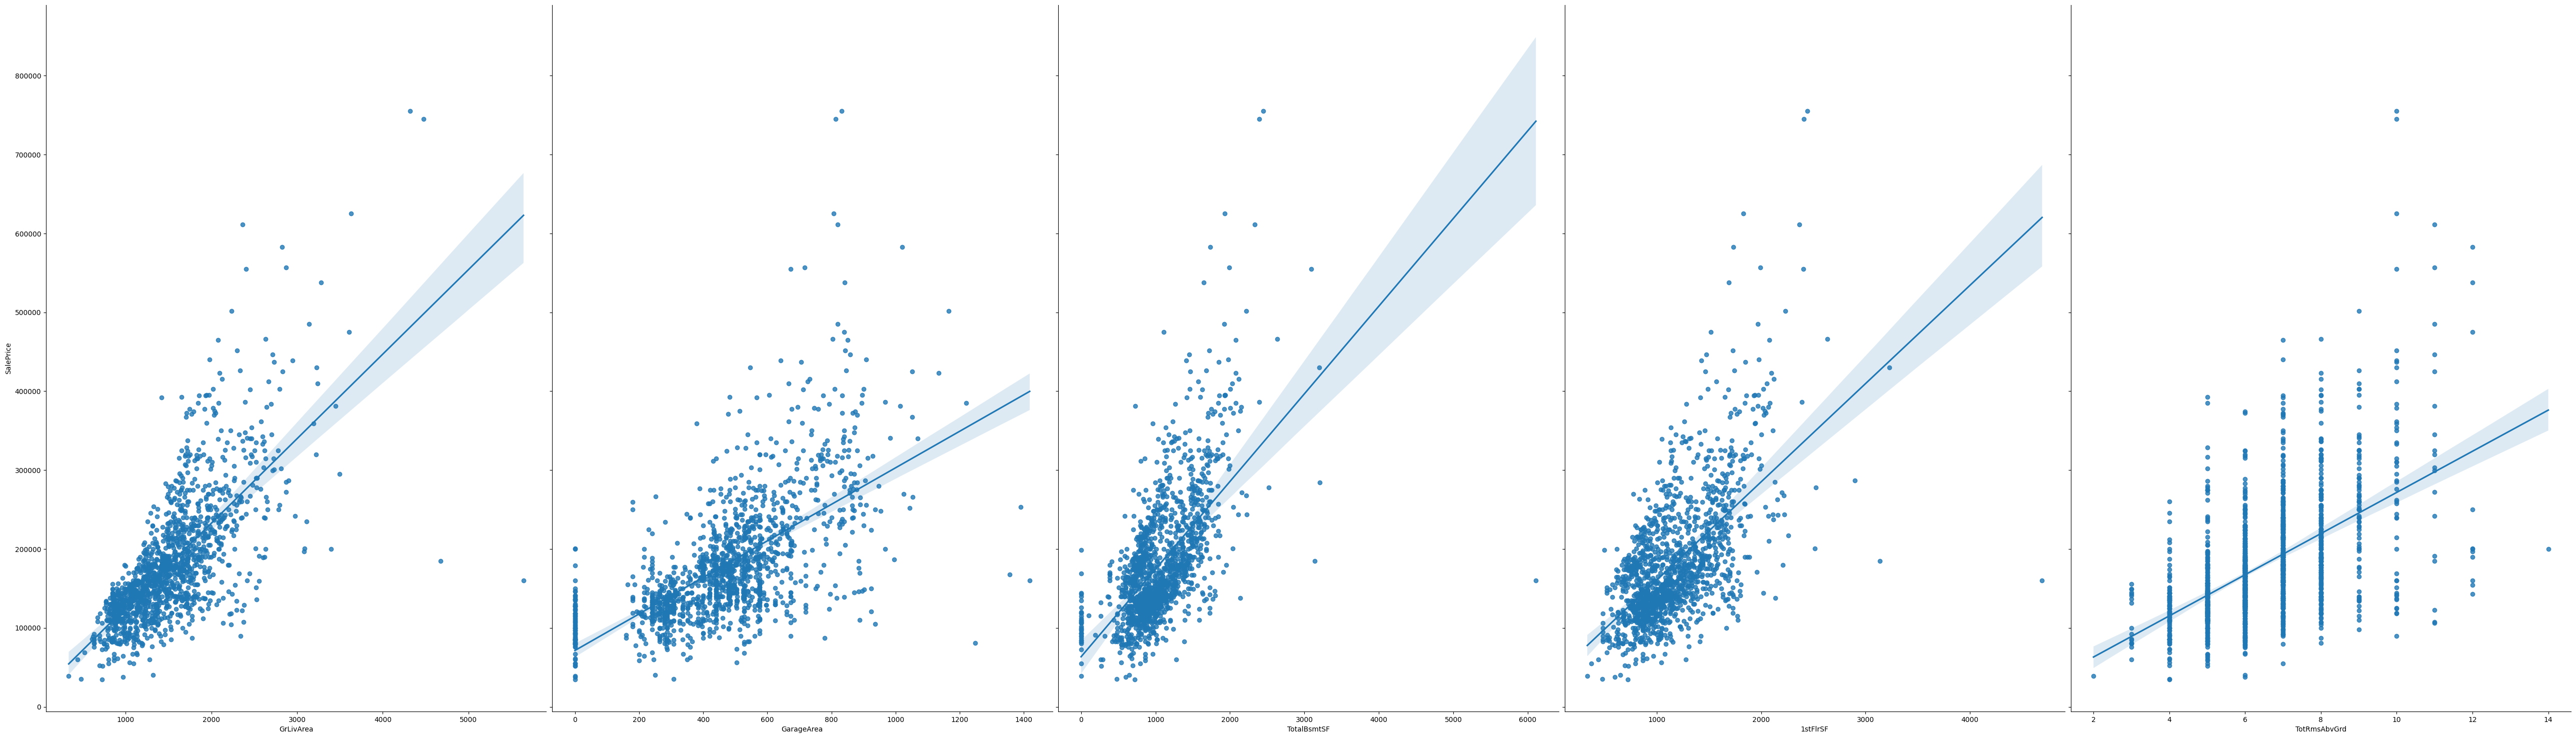

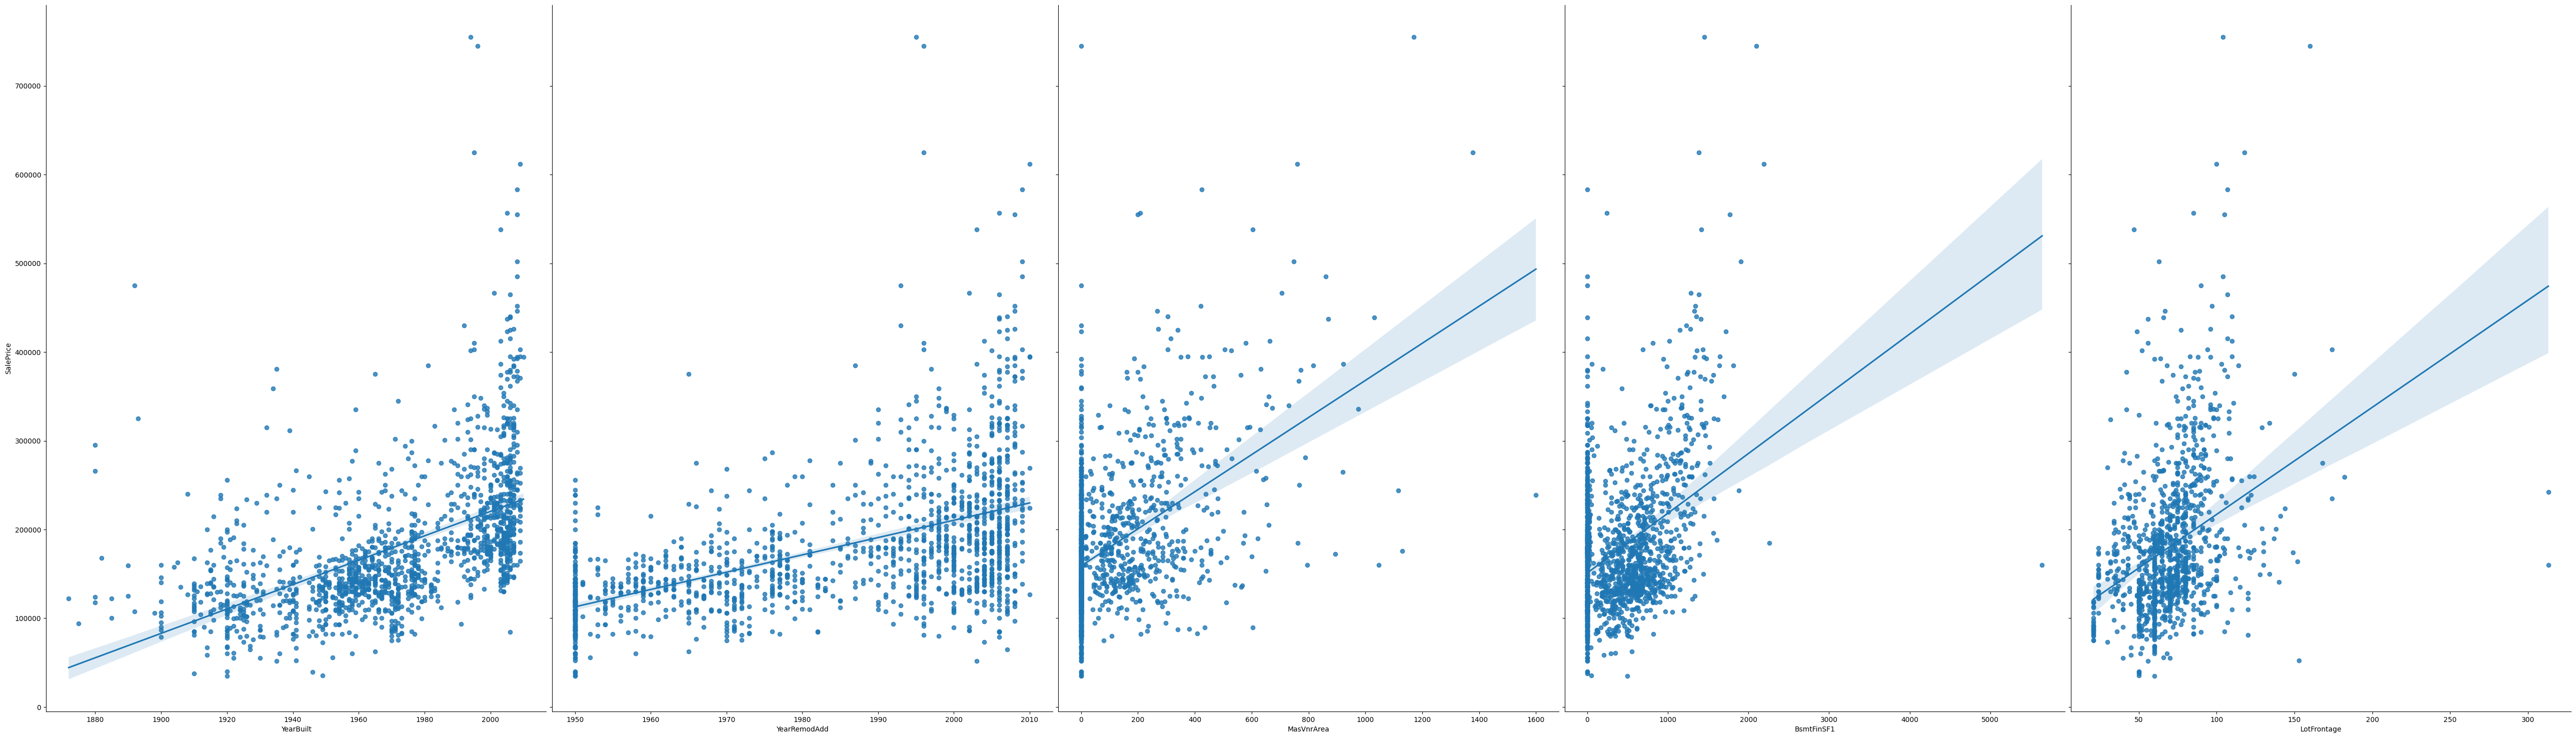

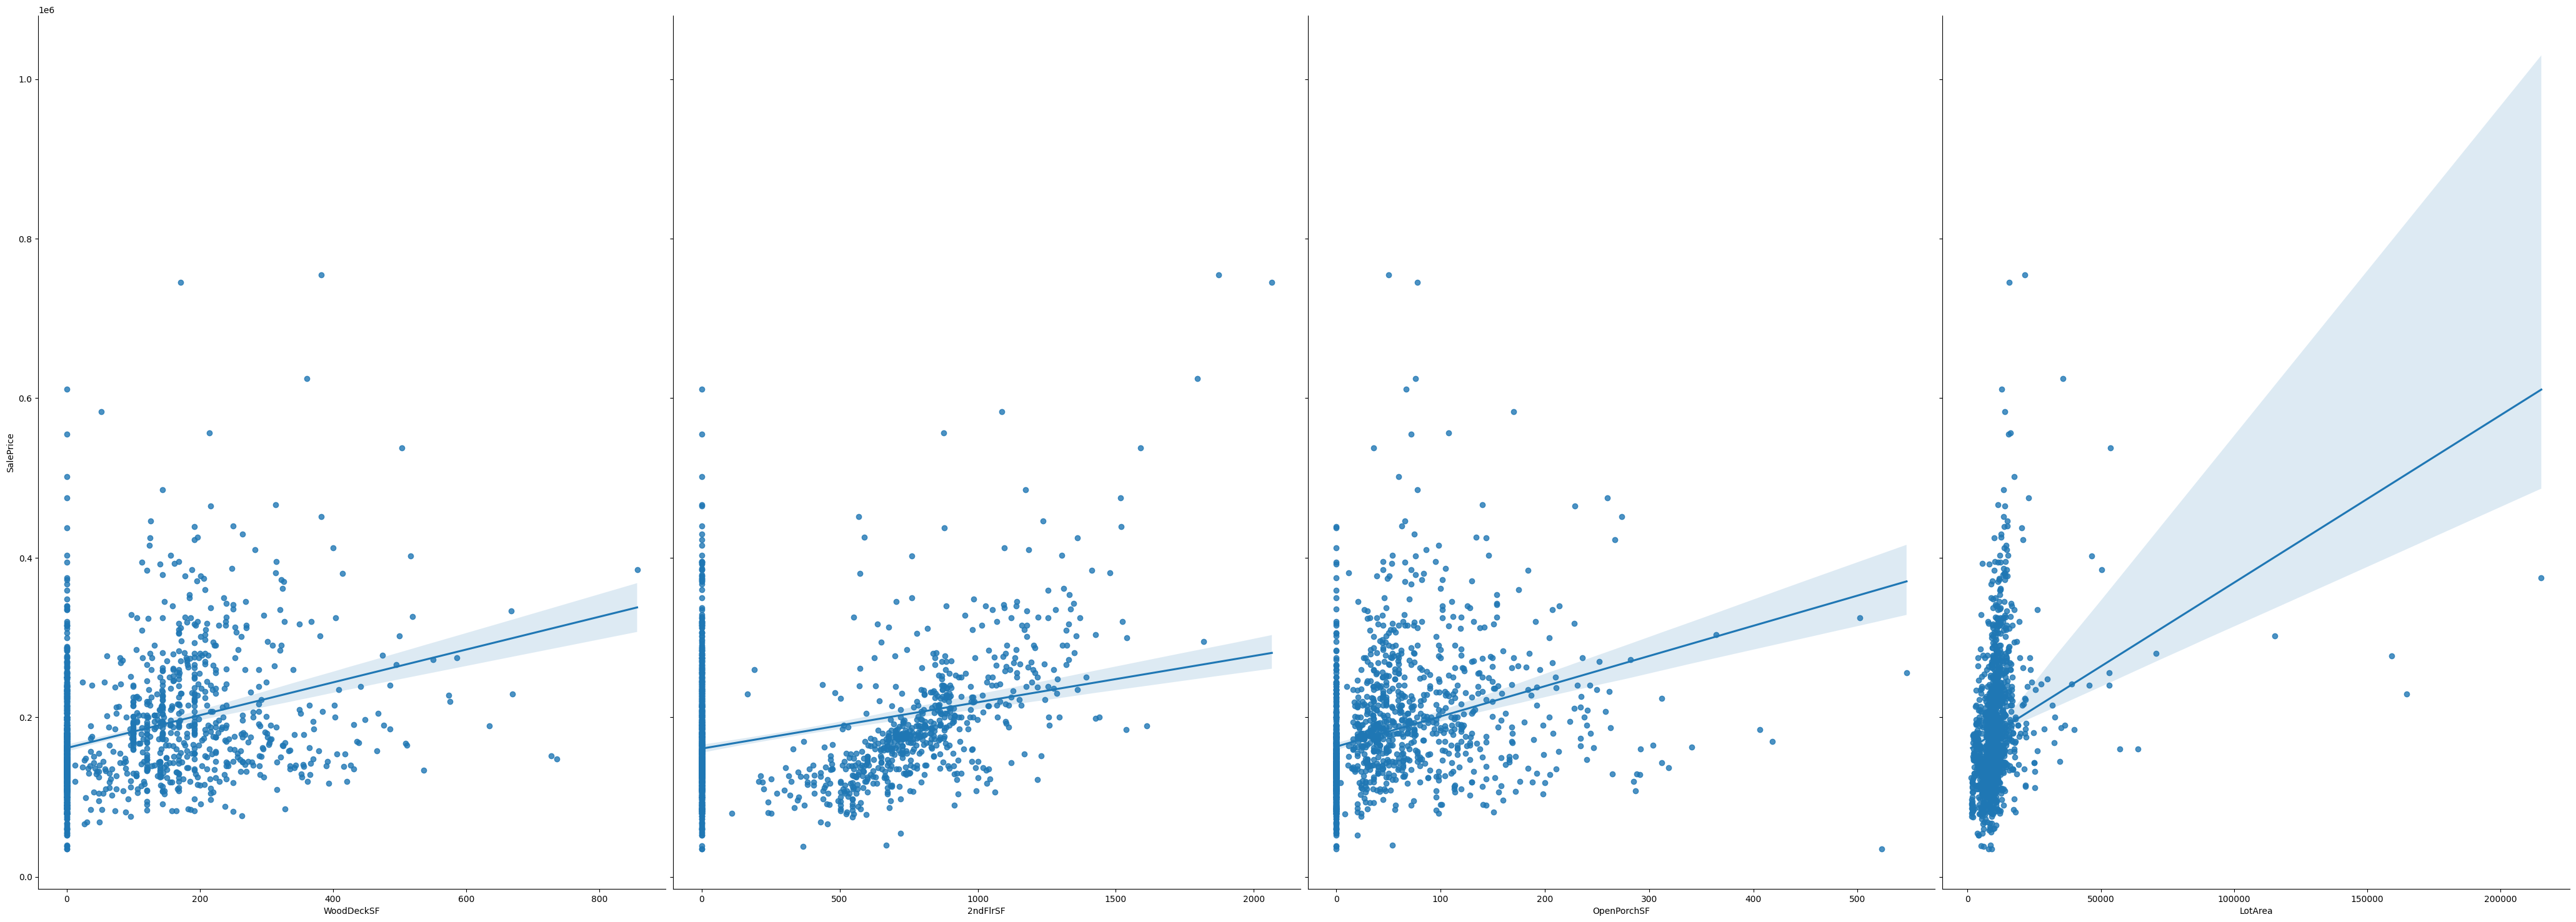

In [2262]:
# Plotting numeric variables against SalePrice

sns.pairplot(housing_data, x_vars=['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd'], y_vars='SalePrice', height=15, aspect=0.7, kind='reg')
sns.pairplot(housing_data, x_vars=['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage'], y_vars='SalePrice', height=15, aspect=0.7, kind='reg')
sns.pairplot(housing_data, x_vars=['WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea'], y_vars='SalePrice', height=15, aspect=0.7, kind='reg')

plt.show()

### Visualizing Categorical variables

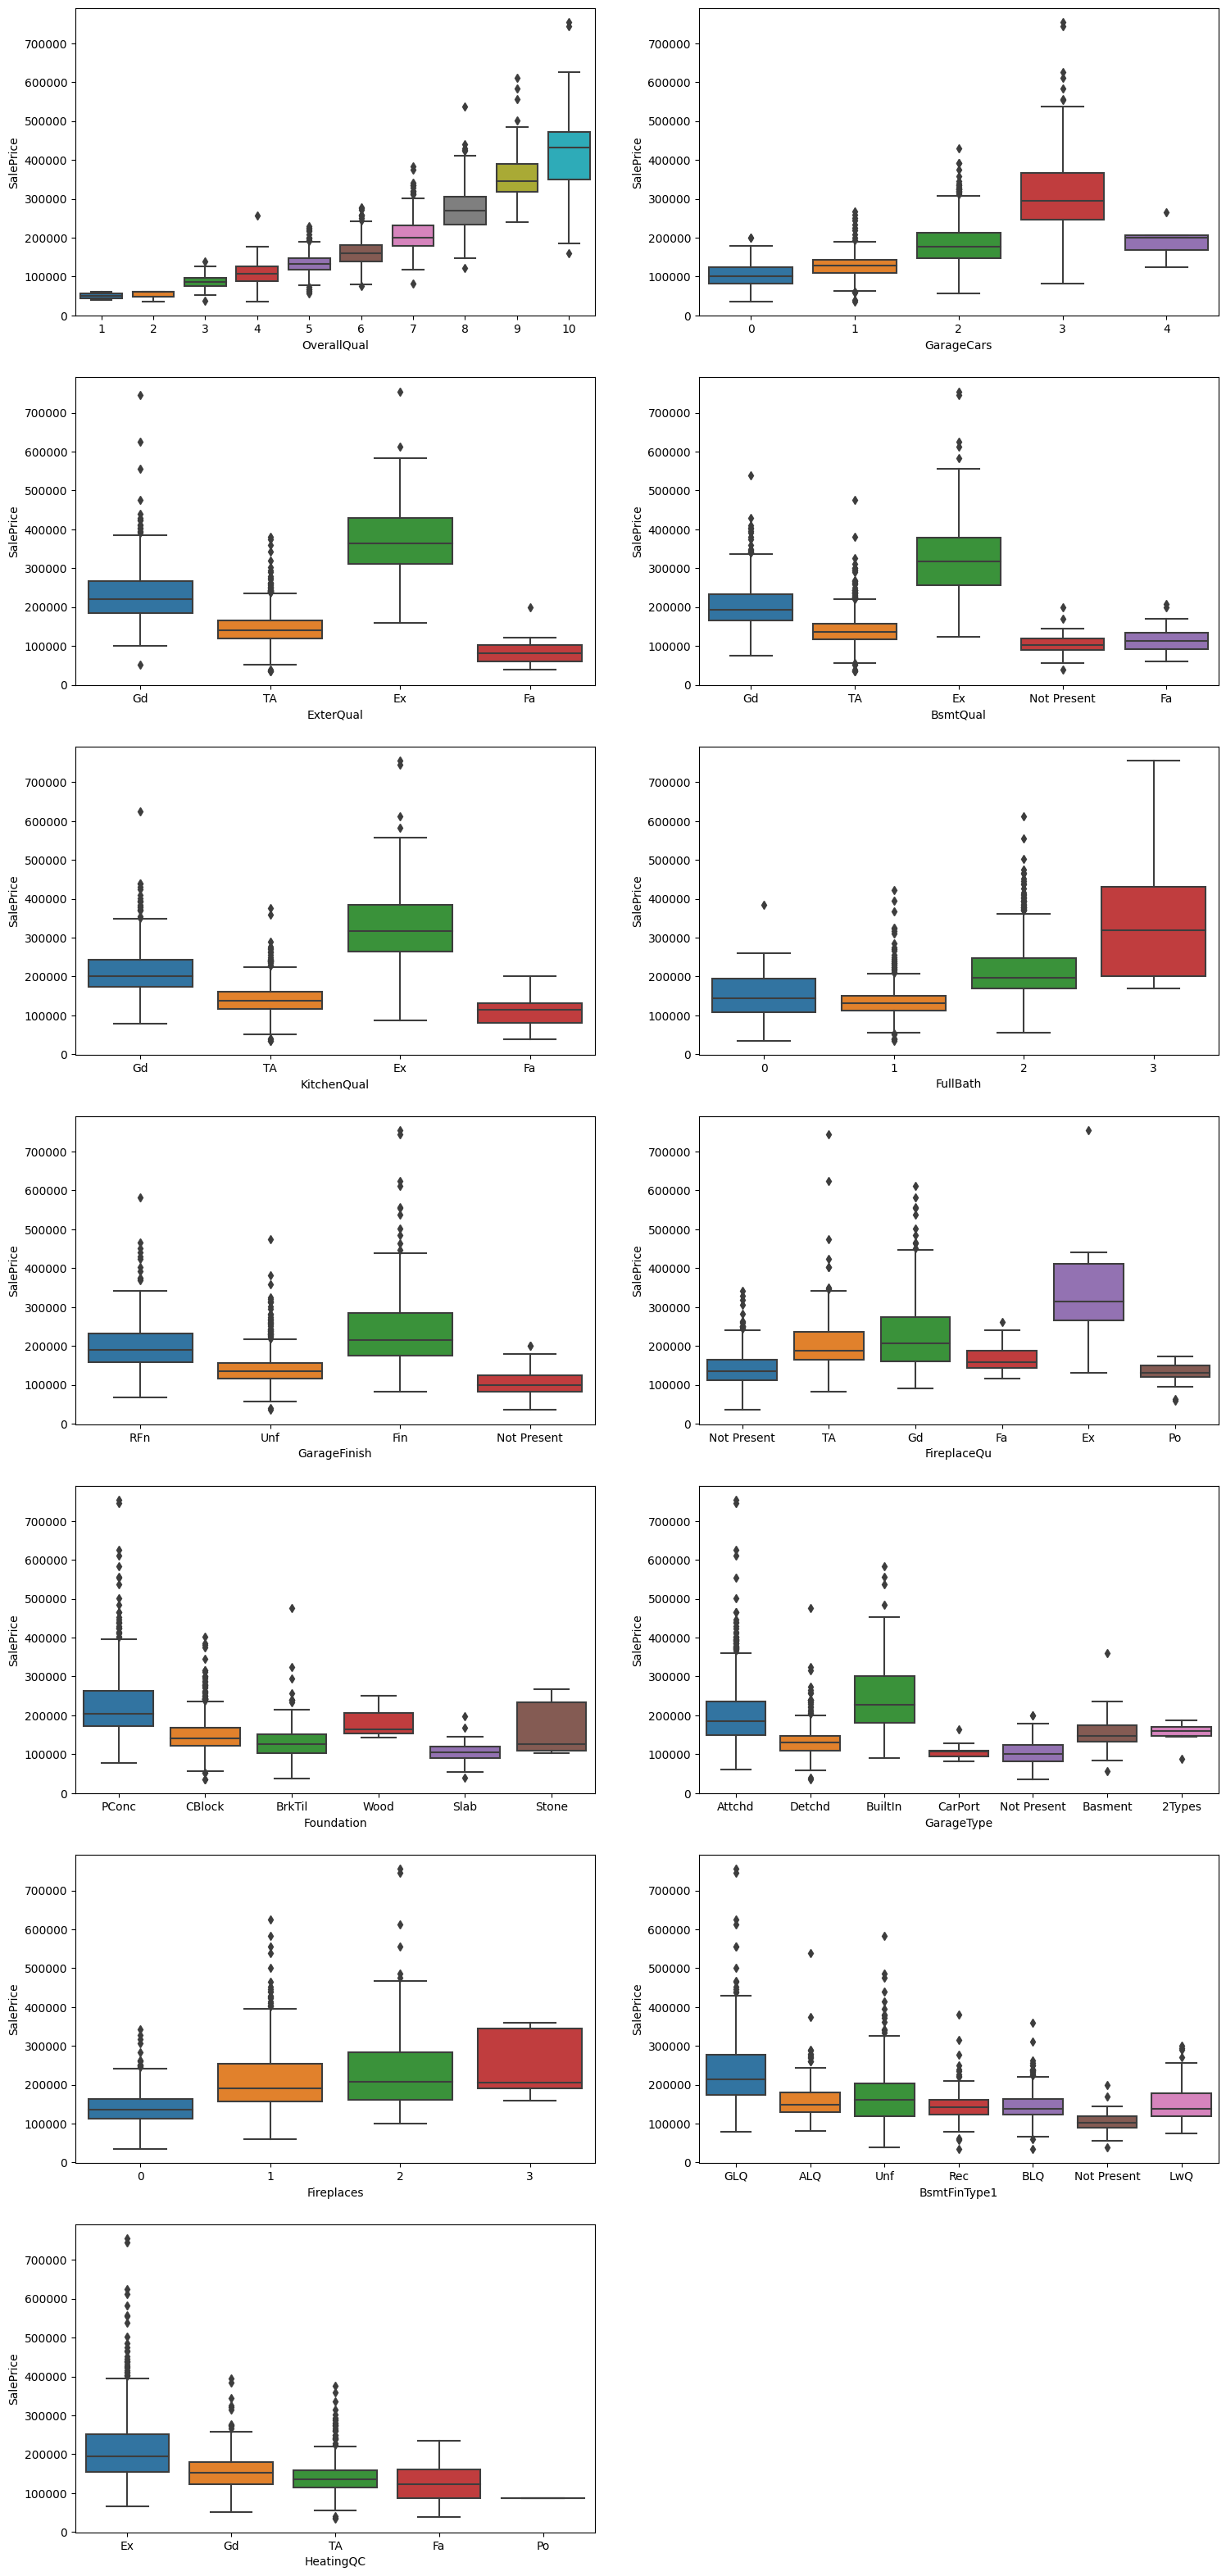

In [2263]:
# plotting boxplots for categorical variables
cat_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']
plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    x_label= f'{col}'
    fig= sns.boxplot(data= housing_data, x= col, y= 'SalePrice')
plt.show()

Plotting correaliation heatmap

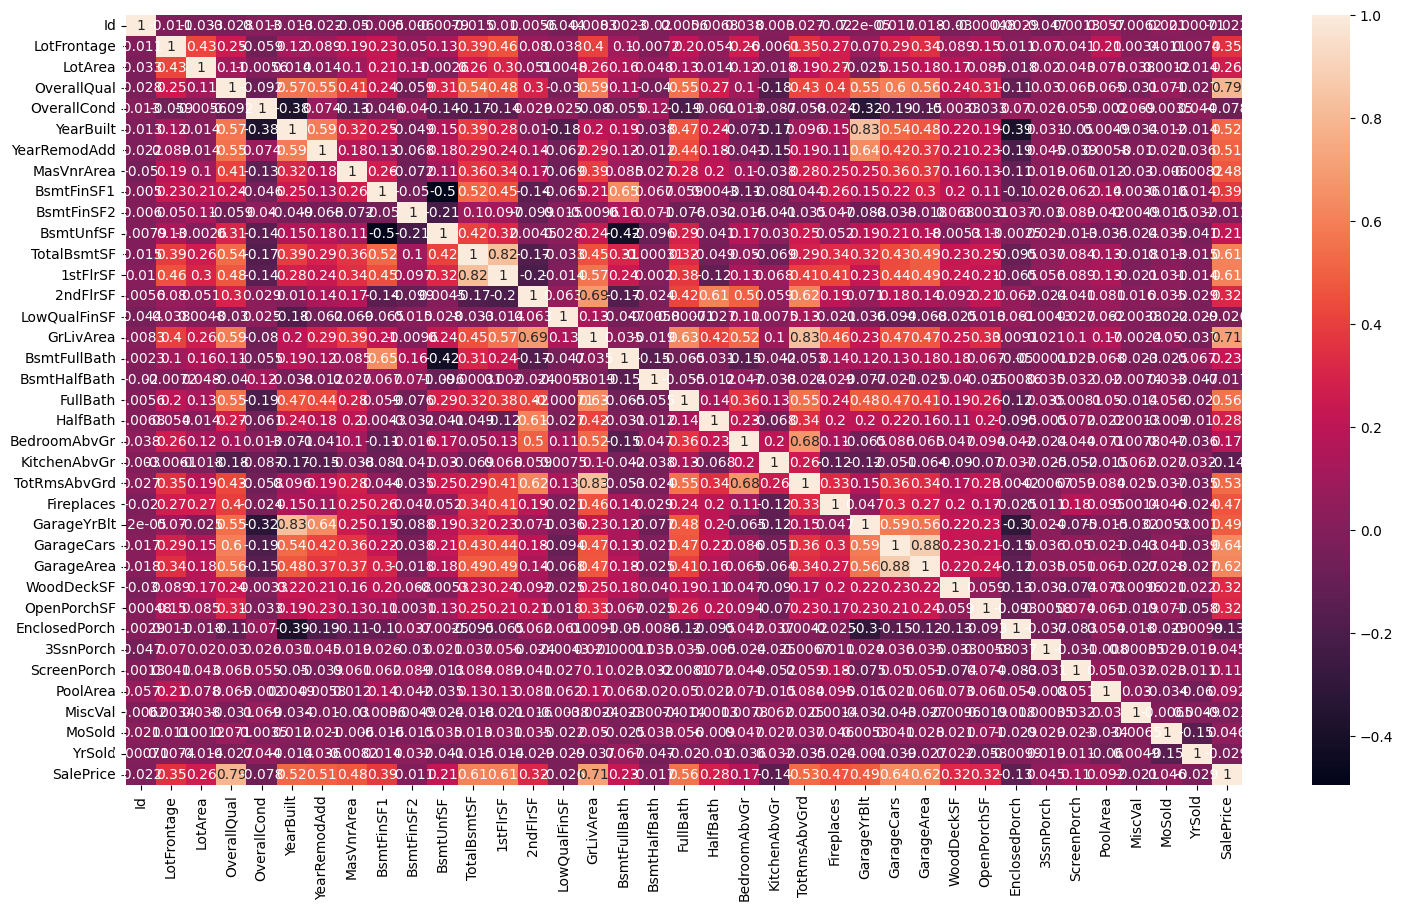

In [2264]:
cor = housing_data.corr()

plt.figure(figsize=(18,10))

sns.heatmap(cor, annot=True)
plt.show()

In [2265]:
# The correlation coefficients for the characteristics below are extremely high., dropping them from the dataset.
housing_data.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housing_data.shape

(1460, 79)

In [2266]:
# removing Id column because it is not required for prediction
housing_data.drop(['Id'], axis=1, inplace= True)
housing_data.shape

(1460, 78)

In [2267]:
# filling missing values
housing_data['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
housing_data['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

In [2268]:
# filling missing values
housing_data['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
housing_data['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

In [2269]:
housing_cat= housing_data.select_dtypes(include= 'object')
housing_num= housing_data.select_dtypes(exclude= 'object')
housing_cat.describe()

MSSubClass MSZoning Street        Alley LotShape LandContour  \
count         1460     1460   1460         1460     1460        1460   
unique          15        5      2            3        4           4   
top             20       RL   Pave  Not Present      Reg         Lvl   
freq           536     1151   1454         1369      925        1311   

       Utilities LotConfig LandSlope Neighborhood  ... GarageType  \
count       1460      1460      1460         1460  ...       1460   
unique         2         5         3           25  ...          7   
top       AllPub    Inside       Gtl        NAmes  ...     Attchd   
freq        1459      1052      1382          225  ...        870   

       GarageFinish GarageQual GarageCond PavedDrive       PoolQC  \
count          1460       1460       1460       1460         1460   
unique            4          6          6          3            4   
top             Unf         TA         TA          Y  Not Present   
freq            605       1311       1326       1340         1453   

              Fence  MiscFeature SaleType SaleCondition  
count          1460         1460     1460          1460  
unique            5            5        9             6  
top     Not Present  Not Present       WD        Normal  
freq           1179         1406     1267          1198  

[4 rows x 44 columns]

#### Getting the Dummy Variables

In [2270]:
housing_data['Street'] = housing_data['Street'].map(lambda x: 1 if x== 'Pave' else 0)
housing_data['Utilities'] = housing_data['Utilities'].map(lambda x: 1 if x== 'AllPub' else 0)
housing_data['CentralAir'] = housing_data['CentralAir'].map(lambda x: 1 if x== 'Y' else 0)

#### One Hot Encoding for the remaining columns

In [2271]:
# Performing get_dummies
cat_cols= housing_cat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
cat_cols= [col for col in cat_cols if col not in done_encoding]
dummies= pd.get_dummies(housing_data[cat_cols], drop_first=True)

c:\Users\arloh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [2272]:
# merging the dummy data with the original data
housing_data.drop(cat_cols, axis=1, inplace= True)
housing_data= pd.concat([housing_data, dummies], axis= 1)
housing_data.shape

(1460, 271)

In [2273]:
# Extract the target variable 'SalePrice' into its own variable 'y'
y= housing_data['SalePrice']
# # Drop the 'SalePrice' column from the DataFrame 'housing_data' to create the feature matrix 'X'
X= housing_data.drop('SalePrice', axis= 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

##### - Get the training features 'X_train' by excluding 'SalePrice'.
##### - Get the target variable 'y_train' for the training set.
##### - Get the testing features 'X_test' by excluding 'SalePrice'.
##### - Get the target variable 'y_test' for the testing set.

In [2274]:
X_train= housing_data.iloc[X_train.index, :].drop('SalePrice', axis= 1)
y_train= housing_data.iloc[X_train.index, :]['SalePrice']
X_test= housing_data.iloc[X_test.index, :].drop('SalePrice', axis= 1)
y_test= housing_data.iloc[X_test.index, :]['SalePrice']

This code applies RobustScaler to scale the numerical features in the training and testing sets, excluding 'SalePrice', to ensure they are on a similar scale

In [2275]:
num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [2276]:
X_train[num_cols].head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1452    -0.223140 -0.255342         -0.2          0.0   0.318533   
762      0.082645 -0.041372          0.2          0.0   0.357143   
932      0.181818  0.089208          0.6          0.0   0.328185   
435     -0.157025  0.045983          0.2          0.2   0.231660   
629      0.165289 -0.024995          0.0          0.0  -0.077220   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
1452      0.186441    0.126743    0.109760    0.000000  -0.290195  ...   
762       0.254237    0.000000   -0.255872    0.000000   0.149603  ...   
932       0.203390    0.478454   -0.272651    0.000000   0.854362  ...   
435       0.033898    0.000000   -0.003496    0.559168  -0.248137  ...   
629      -0.508475    0.410330    0.163591    0.546164  -0.117159  ...   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1452    0.045214    0.000000     0.003912            0.0        0.0   
762     0.143361    0.367391     0.070423            0.0        0.0   
932     0.335245    0.000000     0.641628            0.0        0.0   
435     0.072783    0.343478     0.133020            0.0        0.0   
629     0.039700    0.382609    -0.105634            0.0        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  
1452          0.0       0.0      0.0 -0.090909   -0.50  
762           0.0       0.0      0.0  0.000000    0.50  
932           0.0       0.0      0.0 -0.272727   -0.25  
435           0.0       0.0      0.0 -0.181818    0.25  
629           0.0       0.0      0.0  0.000000    0.00  

[5 rows x 33 columns]

In [2277]:
X_train.shape

(1021, 270)

In [2278]:
X_train.head()

LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  \
1452    -0.223140 -0.255342       1          1         -0.2          0.0   
762      0.082645 -0.041372       1          1          0.2          0.0   
932      0.181818  0.089208       1          1          0.6          0.0   
435     -0.157025  0.045983       1          1          0.2          0.2   
629      0.165289 -0.024995       1          1          0.0          0.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
1452   0.318533      0.186441    0.126743    0.109760  ...               0   
762    0.357143      0.254237    0.000000   -0.255872  ...               0   
932    0.328185      0.203390    0.478454   -0.272651  ...               0   
435    0.231660      0.033898    0.000000   -0.003496  ...               0   
629   -0.077220     -0.508475    0.410330    0.163591  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1452               0             0             0            1   
762                0             0             0            0   
932                0             0             0            1   
435                1             0             0            0   
629                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1452                      0                     0                     0   
762                       0                     0                     0   
932                       0                     0                     0   
435                       0                     0                     0   
629                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1452                     1                      0  
762                      1                      0  
932                      1                      0  
435                      1                      0  
629                      1                      0  

[5 rows x 270 columns]

In [2279]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

#### Removing those columns which are near to zero

In [2280]:
not_required_cols = ['Utilities', 'MSSubClass_40', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Condition1_RRNe', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix',
       'Functional_Sev', 'GarageQual_Po', 'GarageCond_Po', 'PoolQC_Fa',
       'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_Con',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth']
X_train= X_train.drop(not_required_cols,axis=1)
X_test= X_test.drop(not_required_cols,axis=1)

In [2281]:
X_train.shape

(1021, 226)

In [2282]:
housing_data.shape

(1460, 271)

In [2283]:
housing_data.drop(not_required_cols, axis=1, inplace=True)

In [2284]:
missing_info= round(X_train.isna().sum() * 100/X_train.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

GarageYrBlt    5.29
dtype: float64

In [2285]:
# filling missing values in GarageYrBlt with median
X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].median(), inplace= True)

In [2286]:
missing_info= round(X_test.isna().sum() * 100/X_test.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

GarageYrBlt    6.15
dtype: float64

In [2287]:
# filling missing values in GarageYrBlt with median
X_test['GarageYrBlt'].fillna(X_test['GarageYrBlt'].median(), inplace= True)

### Model Building Using Ridge and Lasso Regression

#### Ridge Regression

In [2288]:
# defining the range of alpha values to test
range1= [0.0001,0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,12.0,14.0, 16.0, 18.0, 20,50,100,500,1000]
range2= [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]

In [2289]:
# Using Ridge regression with hyperparameter tuning using GridSearchCV and cross-validation to find the best 'alpha' parameter based on the negative mean absolute error as the evaluation metric.
params_ridge_1 = {'alpha': range1}

ridge = Ridge()

# cross validation
ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid = {'alpha': range1},
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2290]:
print(gcv_ridge.best_params_)
print(gcv_ridge.best_estimator_)
print(gcv_ridge.best_score_)

{'alpha': 12.0}
Ridge(alpha=12.0, random_state=42)
-19162.282637684777


##### Selected Alpha Value is 12

In [2291]:
cv_results = pd.DataFrame(gcv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.022807      0.000484         0.005750        0.001270      0.0001   
1        0.024449      0.000472         0.005461        0.000941       0.001   
2        0.020818      0.007982         0.007696        0.003719        0.01   
3        0.018739      0.002069         0.005895        0.000377         0.2   
4        0.018954      0.001341         0.005762        0.000550         0.3   
5        0.020360      0.002282         0.007143        0.003046         0.4   
6        0.020100      0.000484         0.005696        0.000492         0.5   
7        0.018221      0.000554         0.005543        0.001449         0.6   
8        0.023434      0.006269         0.009740        0.005858         0.7   
9        0.021160      0.000875         0.005756        0.000889         0.8   
10       0.020956      0.003095         0.006011        0.000012         0.9   
11       0.019972      0.000461         0.006339        0.001261         1.0   
12       0.017913      0.000991         0.005497        0.000631         2.0   
13       0.022624      0.004254         0.006395        0.000851         3.0   
14       0.021391      0.001388         0.007369        0.001615         4.0   
15       0.021696      0.000852         0.004784        0.000494         5.0   
16       0.019488      0.001139         0.006314        0.001545         6.0   
17       0.033541      0.011352         0.005442        0.000336         7.0   
18       0.017674      0.002869         0.006081        0.000828        10.0   
19       0.019413      0.004536         0.004862        0.000678        12.0   
20       0.024265      0.009131         0.007642        0.003735        14.0   
21       0.032448      0.008498         0.006944        0.002113        16.0   
22       0.025607      0.011989         0.005002        0.000813        18.0   
23       0.018978      0.000149         0.006518        0.000771          20   
24       0.018179      0.001568         0.005674        0.000474          50   
25       0.022099      0.003646         0.005900        0.001441         100   
26       0.020800      0.003587         0.005330        0.000475         500   
27       0.018434      0.001058         0.007643        0.003074        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -24703.330747      -25695.735359   
1    {'alpha': 0.001}      -24559.647964      -25645.838238   
2     {'alpha': 0.01}      -23739.428569      -25272.955645   
3      {'alpha': 0.2}      -22425.855590      -23445.619432   
4      {'alpha': 0.3}      -22156.491530      -23095.361233   
5      {'alpha': 0.4}      -21934.113463      -22811.867978   
6      {'alpha': 0.5}      -21754.031058      -22583.130459   
7      {'alpha': 0.6}      -21597.816647      -22386.020748   
8      {'alpha': 0.7}      -21456.033907      -22210.709382   
9      {'alpha': 0.8}      -21335.154651      -22053.527647   
10     {'alpha': 0.9}      -21227.227418      -21910.278391   
11     {'alpha': 1.0}      -21130.981628      -21781.892494   
12     {'alpha': 2.0}      -20468.318039      -20904.442149   
13     {'alpha': 3.0}      -20098.836237      -20431.782012   
14     {'alpha': 4.0}      -19843.385575      -20148.888747   
15     {'alpha': 5.0}      -19648.299697      -19953.462490   
16     {'alpha': 6.0}      -19506.274919      -19830.522437   
17     {'alpha': 7.0}      -19417.467235      -19749.763909   
18    {'alpha': 10.0}      -19306.525386      -19654.316517   
19    {'alpha': 12.0}      -19321.076291      -19667.684046   
20    {'alpha': 14.0}      -19359.491698      -19715.602796   
21    {'alpha': 16.0}      -19416.369008      -19787.503316   
22    {'alpha': 18.0}      -19482.316950      -19870.656367   
23      {'alpha': 20}      -19555.040540      -19958.600054   
24      {'alpha': 50}      -20962.099205      -21509.412708   
25     {'alpha': 100}      -22815.245963     

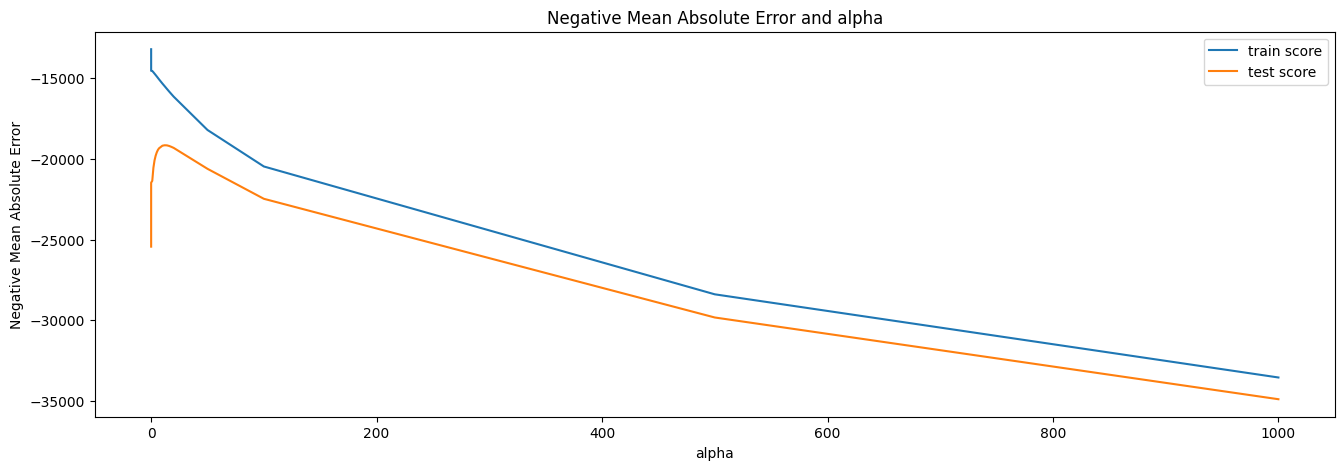

In [2292]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting the training and testing scores (negative mean absolute error) for different alpha values used in Ridge regression after hyperparameter tuning with GridSearchCV.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [2293]:
gcv_ridge= gcv_ridge.best_estimator_
gcv_ridge.fit(X_train, y_train)

Ridge(alpha=12.0, random_state=42)

In [2294]:
alpha = 12.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=12.0)

In [2295]:
y_train_pred = gcv_ridge.predict(X_train)
print("R2 Score on Training data ", round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred), 4))

R2 Score on Training data  0.8824


In [2296]:
y_test_pred= gcv_ridge.predict(X_test)
print("R2 Score on Test data ", round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred), 4))

R2 Score on Test data  0.8714


In [2297]:
#  Lasso regression with hyperparameter tuning using GridSearchCV and cross-validation to find the best 'alpha' parameter based on the negative mean absolute error as the evaluation metric.
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= {'alpha': range1},
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train) 

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2298]:
print(lasso_gcv.best_params_)
print(lasso_gcv.best_estimator_)
print(lasso_gcv.best_score_)

{'alpha': 100}
Lasso(alpha=100, random_state=42)
-19031.045133247233


Selected Alpha value is 100

In [2299]:
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=100, random_state=42)

In [2300]:
y_train_pred = lasso_model.predict(X_train)
print("R2 Score on Training data ", round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred), 4))

R2 Score on Training data  0.8865


In [2301]:
y_test_pred= lasso_model.predict(X_test)
print("R2 Score on Testing Data ", round( metrics.r2_score(y_true=y_test, y_pred=y_test_pred), 4))

R2 Score on Testing Data  0.8751


In [2302]:
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 123
Features present in Ridge: 226


In [2303]:
lasso_model.intercept_

148277.9292460121

##### Top 25 features in Lasso model

In [2304]:
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

GrLivArea               72379.639314
OverallQual             54300.360636
Neighborhood_StoneBr    44465.119757
Neighborhood_NoRidge    44443.945298
Exterior2nd_ImStucc     35653.861510
RoofMatl_WdShngl        33881.475494
Neighborhood_NridgHt    32970.661561
LandContour_HLS         26900.629423
BsmtQual_Gd            -26288.208899
KitchenQual_TA         -25219.261499
BsmtQual_TA            -24797.991516
GarageArea              23075.229033
KitchenQual_Gd         -23017.694399
2ndFlrSF                22588.304500
Exterior1st_BrkFace     22025.499855
BsmtQual_Not Present   -20877.310648
LotShape_IR3           -18716.461040
Condition2_Norm         18589.750529
OverallCond             18057.169862
BsmtExposure_Gd         17758.565625
FullBath                17183.863845
HouseStyle_1Story       16032.106291
BldgType_Twnhs         -15721.107140
LandContour_Lvl         15260.464880
Neighborhood_Edwards   -14359.864533
dtype: float64

### Conclusion

- Ridge and Lasso model both have given the almost the same accuracy, and it concludes that overfitting is not present.
- R2 Score of both the model on test dataset is 0.8714 and 0.8751 respectively.
- In Lasso regression the model has selected 123 features excluding 103 features
- Also from above we can see the top 25 features of Lasso regression.

### When the alpha value is Doubled

In [2305]:
# doubled for ridge regression
ridge2= Ridge(alpha= 24, random_state= 42)
ridge2.fit(X_train, y_train)

Ridge(alpha=24, random_state=42)

In [2306]:
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual             37343.747126
GrLivArea               29584.067645
2ndFlrSF                23742.655375
Neighborhood_NoRidge    22058.640834
GarageArea              19906.674601
Neighborhood_StoneBr    19578.506084
BsmtQual_Gd            -19181.262516
Neighborhood_NridgHt    18560.617020
1stFlrSF                18336.531824
KitchenQual_TA         -18186.272366
dtype: float64

In [2307]:
# doubled for lasso regression
lasso2= Lasso(alpha= 200, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=200, random_state=42)

In [2308]:
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               78389.463283
OverallQual             62216.868476
Neighborhood_NoRidge    39883.648894
Neighborhood_StoneBr    36591.196190
Neighborhood_NridgHt    29849.947116
GarageArea              24068.315123
KitchenQual_TA         -21909.702564
BsmtQual_Gd            -20329.602834
KitchenQual_Gd         -20214.044086
Exterior1st_BrkFace     18928.209812
dtype: float64

<AxesSubplot:>

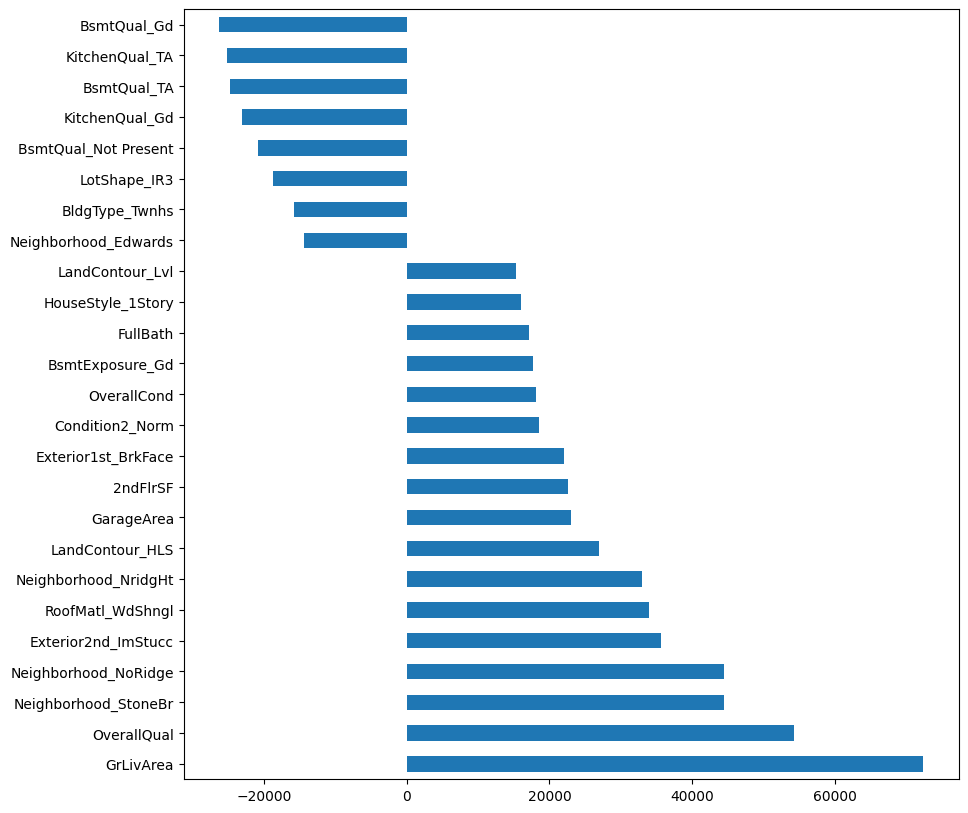

In [2309]:
top25_features_lasso.nlargest(25).plot(kind='barh', figsize=(10, 10))

In [2310]:
# Top 5 features after doubling alpha in lasso regression
top25_features_lasso.nlargest()

GrLivArea               72379.639314
OverallQual             54300.360636
Neighborhood_StoneBr    44465.119757
Neighborhood_NoRidge    44443.945298
Exterior2nd_ImStucc     35653.861510
dtype: float64

In [2311]:
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [2312]:
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 199), (439, 199))

In [2313]:
lasso3= Lasso(alpha= 100, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=100, random_state=42)

In [2314]:
# Top 5 features of previous lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

2ndFlrSF            95190.091820
1stFlrSF            78827.865030
RoofMatl_WdShngl    43940.797682
KitchenQual_TA     -42804.537369
BsmtQual_TA        -37007.480799
dtype: float64